# Esercitazione 2: Python e librerie numpy, matplotlib, pandas

**Task:**

Implementare, senza fare uso di librerie dedicate di Machine Learning, un semplice algoritmo di classificazione basato sulla stima delle densità di probabilità delle feature discriminanti (*Classificatore Naive di Bayes*)

**Parte 0**

Giocare con numpy

In [1]:
# confronto tra un vettore 1D in numpy e una lista in python

import numpy as np

dim = 10
lista_python = list(range(dim))
array_numpy = np.arange(dim)

print(lista_python)
print('')
print(array_numpy.shape)  # dimensioni
print('')
print(array_numpy)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

(10,)

[0 1 2 3 4 5 6 7 8 9]


In [2]:
# confrontiamo i tempi necessari per fare una semplice operazione su i due vettori

dim = 100000
lista_python = list(range(dim))
array_numpy = np.arange(dim)

%timeit lista_python_2 = [x * 2 for x in lista_python]   # il modulo timeit di python permette du misurare il tempo di esecuzione di semplici parti di codice python

%timeit array_numpy_2 = array_numpy * 2

print('numpy is typically 100 times faster than python')

3.42 ms ± 87.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
74.3 µs ± 12.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
numpy is typically 100 times faster than python


In [3]:
# un array multidimensionale in numpy

array2 = np.ones(shape=(100,10,10))  # np.ones crea un arry con tutti gli elementi inizializzati a 1
array2int = np.ones(shape=(100,10,10),dtype='int32')
array3 = np.full(shape=(100,10,10), fill_value=33.0)

print(array2.shape,'\n')
print(array2.dtype,'\n')
print(array2int.dtype,'\n')
print(array2[:2,:,:],'\n')  # array[a:b] seleziona gli elementi da a a b-1 dell'array ([:] equivale all'intero array)
print(array2int[:2,:,:],'\n')
print(array3[:2,:,:],'\n')

(100, 10, 10) 

float64 

int32 

[[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]] 

[[[1 1 1 1 1 1 1 1 1 1]
  [1 1 1 1 1 1 1 1 1 1]
  [1 1 1 1 1 1 1 1 1 1]
  [1 1 1 1 1 1 1 1 1 1]
  [1 1 1 1 1 1 1 1 1 1]
  [1 1 1 1 1 1 1 1 1 1]
  [1 1 1 1 1 1 1 1 1 1]
  [1 1 1 1 1 1 1 1 1 1]
  [1 1 1 1 1 1 1 1 1 1]
  [1 1 1 1 1 1 1 1 1 1]]

 [[1 1 1 1 1 1 1 1 1 1]
  [1 1 1 1 1 1

In [4]:
# generazione di numeri random con numpy

# numpy contiene una libreria di generatori di numeri random molto ampia (più o meno tutte le distribuzioni note)

gaussian_array = np.random.normal(loc=4.0, scale=2.0, size=(100))  # array di dimensione (100) contenente numeri gaussiani random con mu=loc, sigma=scale

uniform_array = np.random.uniform(low=0.,high=22.0, size=(10,10)) # array di dimensione (10,10) contenente numeri uniformi random tra low e high

print(gaussian_array[:10],'\n')
print(uniform_array[0,:],'\n')

[3.86710339 3.58020089 1.6872187  4.3935522  5.75393544 6.38230957
 1.31864227 3.92532502 5.16482258 9.50500193] 

[18.75993197  5.23581817  2.89911912 18.7785787   6.53047812  5.9346597
  6.63438382 18.08751259  8.89484244  9.04535125] 



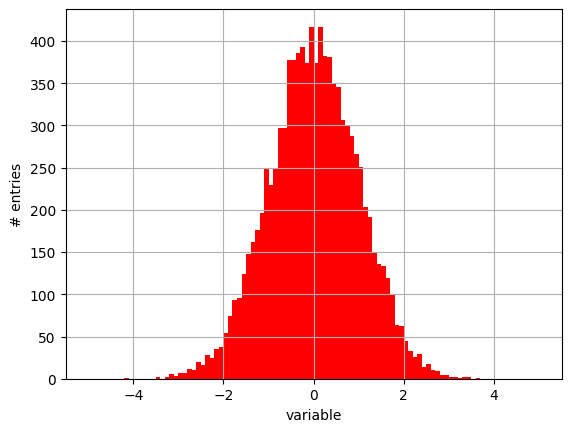

In [6]:
# istogramma in matplotlib contenente la distribuzione generata da numpy
import matplotlib.pyplot as plt

gaussian_array2 = np.random.normal(loc=0.0, scale=1.0, size=(10000))

n, bins, _ = plt.hist(gaussian_array2, bins=100, range=[-5.,5.], color='red', density=False, cumulative=False)
plt.xlabel('variable')
plt.ylabel('# entries')
plt.grid()
plt.draw()

**Parte 1**

Generazione di un dataset "toy":

1. generare due campioni di esempi (uno per la classe segnale ($S$) e uno per la classe fondo ($B$)).<p>

> Ogni esempio è descritto da un vettore di dimensione $d=3$, in cui le tre feature, $(x_0,x_1,x_2)$, sono distribuite in accordo a distribuzioni gaussiane multivariate: $f(x_0,x_1,x_2) = GaussianaMultivariata(x_0,x_1,x_2:\mu, cov)$, con $\mu$ il vettore delle medie delle tre variabili e $cov$ la matrice $3\times 3$ di covarianza (ogni dimensione corrisponde ad una feature (osservabile) del dataset). <p>

> `Suggerimento: usare la funzione numpy: np.random.multivariate_normal(mean, cov, size) in cui mean è un vettore con i valori medi delle 3 feature, e cov è la matrice 3x3 di covarianza`

> le medie delle due distribuzioni per segnale e fondo da utilizzare sono: $\mu_S = [0.0, 4.0, -1.0]$, $\mu_B = [-2.5, 2.0, 2.0]$
> la matrice di covarianza tra le variabili è la stessa per le due classi $S$ e $B$ ed è data dalla matrice diagonale $diag[4.0, 1.0, 2.25]$
> la dimensione dei campioni è di $N=3000$ esempi per ognuna delle due classi.

2. graficare le distribuzioni delle feature delle due classi su tre proiezioni 2D: $(x_0,x_1), (x_0,x_2), (x_1,x_2)$ colorando con colori rosso e blu i punti appartenenti agli eventi di classe $S$ e $B$ rispettivamente <p>

>`Suggerimento: usare la funzione matplotlib: plt.plot(x,y, color) in cui color='r' o 'b')`



Dataset iniziale:
      	  segnale  	  fondo
shape 	  (3000, 3)    	  (3000, 3)
size  	  9000       	  9000



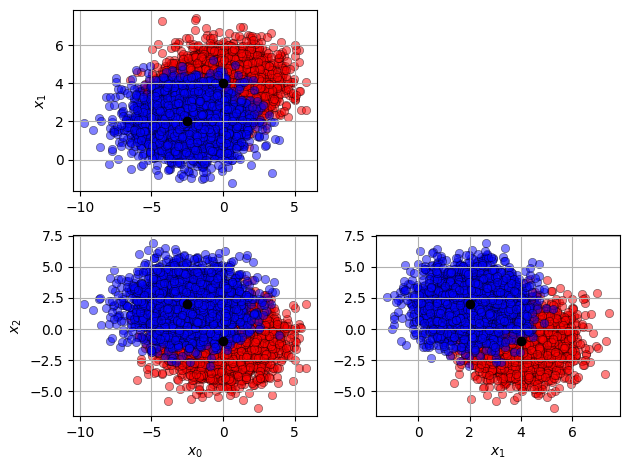

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 3000
mu_S = np.array([0.0, 4.0, -1.0])
mu_B = np.array([-2.5, 2.0, 2.0])
diag = np.array([4.0, 1.0, 2.25])
cov = np.diag(diag)

dataS = np.random.multivariate_normal(mu_S, cov, N)
dataB = np.random.multivariate_normal(mu_B, cov, N)

print(f'''
Dataset iniziale:
      \t  segnale  \t  fondo
shape \t  {dataS.shape}    \t  {dataS.shape}
size  \t  {dataB.size}       \t  {dataB.size}
''')

plt.subplot(2,2,1)
plt.scatter(dataS[:,0], dataS[:,1], color='r', edgecolor='k', linewidth=0.5, alpha=0.5)
plt.scatter(dataB[:,0], dataB[:,1], color='b', edgecolor='k', linewidth=0.5, alpha=0.5)
plt.plot(mu_S[0], mu_S[1], marker='o', color='k')
plt.plot(mu_B[0], mu_B[1], marker='o', color='k')
plt.ylabel(r'$x_1$')
plt.grid()
plt.subplot(2,2,3)
plt.scatter(dataS[:,0], dataS[:,2], color='r', edgecolor='k', linewidth=0.5, alpha=0.5)
plt.scatter(dataB[:,0], dataB[:,2], color='b', edgecolor='k', linewidth=0.5, alpha=0.5)
plt.plot(mu_S[0], mu_S[2], marker='o', color='k')
plt.plot(mu_B[0], mu_B[2], marker='o', color='k')
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_2$')
plt.grid()
plt.subplot(2,2,4)
plt.scatter(dataS[:,1], dataS[:,2], color='r', edgecolor='k', linewidth=0.5, alpha=0.5)
plt.scatter(dataB[:,1], dataB[:,2], color='b', edgecolor='k', linewidth=0.5, alpha=0.5)
plt.plot(mu_S[1], mu_S[2], marker='o', color='k')
plt.plot(mu_B[1], mu_B[2], marker='o', color='k')
plt.xlabel(r'$x_1$')
plt.grid()
plt.tight_layout()

**Parte 2**

Stima delle funzioni di distribuzione di probabilità delle singole osservabili per le due classi $S$ e $B$: <p>

>$pdf(x_0|C),~ pdf(x_1|C), ~pdf(x_2|C)$ con $C=S,B$

Procedura:

1. costruire 3 histogrammi per ciascuna classe, con $M=20$ bin negli intervalli $(\mu-4\sigma, \mu+4\sigma)$ che contengano la distribuzione della densità di probabilità delle features $x_0,x_1,x_2$ nelle due classi. <p>

> `Suggerimento: costruire un histogramma con plt.hist e riempirlo con ciascuna feature, usando l'opzione di avere histogrammi normalizzati (density=True)`

> NOTA: usare solo i primi 2000 eventi di ogni campione per costruire gli istogrammi, lasciando i restanti 1000 come campione di test.


2. scrivere una funzione python che prende in input un valore della feature $x$, uno degli istogrammi $H$, e ritorna la stima della probabilità associata $f(x_i) = pdf(x_i|S)$. <p>  

>SUGGERIMENTO: la funzione *n, edges, patches = plt.hist(x,...)* di matplotlib ritorna tre array numpy: *n* contenenente il contenuto dei bin, *edges* contenente le edge (il valore della $x$ corrispondente all'estremo superiore) di ogni bin, ed il terzo non interessante per gli scopi.

> la funzione deve identificare quale è l'indice del array *edges* che contiene il valore della feature *x*, e poi prendere come stima della probabilità $p(x|C)$ il valore dell array *n* che corrisponde a quel bin

>SUGGERIMENTO: la funzione *np.where* permette ritorna gli elementi del vettore che soddisfano una data condizione.

3. plottare con matplotlib gli istogrammi così costruiti

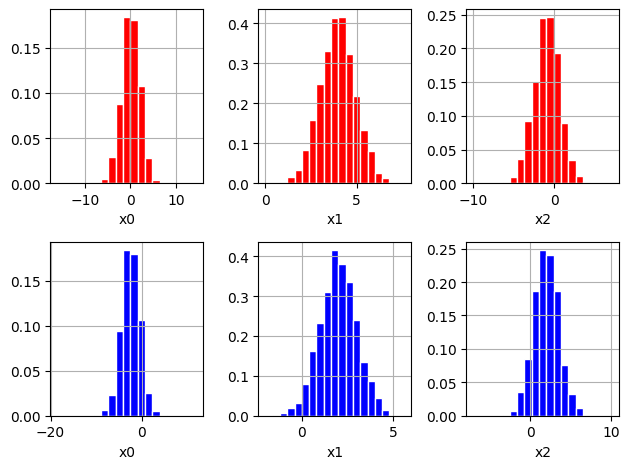

In [3]:
train_size = 2000
trainS = dataS[:train_size,:]
trainB = dataB[:train_size,:]

test_size = 1000
testS = dataS[train_size:, :]
testB = dataB[train_size:, :]

M = 20

binsS = []
binsB = []
for i in range(3):
  minS = mu_S[i]-4*cov[i][i]
  maxS = mu_S[i]+4*cov[i][i]
  stepS = (maxS-minS)/M
  minB = mu_B[i]-4*cov[i][i]
  maxB = mu_B[i]+4*cov[i][i]
  stepB = (maxB-minB)/M
  binsS.append(np.arange(minS, maxS, stepS))
  binsB.append(np.arange(minB, maxB, stepB))

nS = []
nB = []
edgesS = []
edgesB = []

labels=['x0', 'x1', 'x2']
for i in range(3):
  plt.subplot(2,3,i+1)
  n1, edges1, _ = plt.hist(trainS[:,i], binsS[i], density=True, color='red', edgecolor='white')
  plt.xlabel(labels[i])
  plt.grid()
  nS.append(n1)
  edgesS.append(edges1)
plt.tight_layout()
for i in range(3):
  plt.subplot(2,3,i+4)
  n2, edges2, _ = plt.hist(trainB[:,i], binsB[i], density=True, color='blue', edgecolor='white')
  nB.append(n2)
  edgesB.append(edges2)
  plt.xlabel(labels[i])
  plt.grid()
plt.tight_layout()

In [4]:
# la funzione deve identificare qual è l'indice del array edges che contiene il
# valore della feature x, e poi prendere come stima della probabilità p(x|C) il
# valore dell array n che corrisponde a quel bin

def PDF(x, n, e):  # feature, n, edges
  if x>e[-1] or x<e[0]:  # controllo se il valore selezionato sta nell'istogramma
    return 0.0
  item = np.where(e<x)  # ritorna un array 2D, nella prima D ci sono gli indici
  return n[item[0][-1]]

print('pdf(x0=1.0|S) = ',PDF(1.0, nS[0], edgesS[0]))
print('pdf(x0=1.0|B) = ',PDF(1.0, nB[0], edgesB[0]))
print('pdf(x1=2.0|S) = ',PDF(2.0, nS[1], edgesS[1]))
print('pdf(x1=2.0|B) = ',PDF(2.0, nB[1], edgesB[1]))
print('pdf(x2=8.0|S) = ',PDF(8.0, nS[1], edgesS[1]))
print('pdf(x2=7.0|B) = ',PDF(7.0, nB[1], edgesB[1]))

pdf(x0=1.0|S) =  0.18062500000000023
pdf(x0=1.0|B) =  0.025312499999999977
pdf(x1=2.0|S) =  0.03375000000000001
pdf(x1=2.0|B) =  0.38125000000000053
pdf(x2=8.0|S) =  0.0
pdf(x2=7.0|B) =  0.0


**Parte 3**

Costruire un classificatore basato sul cosidetto maximum likelihood ratio (MLR). Il MLR permette di definire un discriminante statistico per gli eventi appartenenti tra due classi, tramite il rapporto tra le distribuzioni di probabilità $p(x|C)$ delle feature nelle due classi. <p>

Assumendo stesse probabilità a priori per le due classi $P(S)=P(B)$ il discriminante di MLR assume la forma:

> $\color{red}{d(x_0,x_1,x_2) = \frac{\prod_{i} p(x_i|S)}{\prod_{i}\, p(x_i|S)~+~\prod_{i}\, p(x_i|B)}}$

in cui la produttoria scorre sulle pdf delle tre features $i=1,\cdots,3$.

Quando $\prod_{i} p(x_i|S) \gg \prod_{i} p(x_i|B) \Rightarrow d\to 1$, quando $\prod_{i} p(x_i|S) \ll \prod_{i} p(x_i|B) \Rightarrow d\to 0$.

1.    costruire la funzione discriminante $d(x_0,x_1,x_2)$;
2.    printare i valori di $d(\mu_S)$ e $d(\mu_B)$
3.    graficare un istogramma della variabile discriminante $d$ per gli eventi delle classi $S$ (colore rosso) e $B$ (colore blu);
4.    costruire una funzione che implementi la regola di classificazione: <p>
$\color{red}{d(x_0,x_1,x_2)\ge 0.5 \to \text{classe}\,S;\,\,\text{altimenti} \to \text{classe}\,B}$
5.    usando i 2000 eventi del campione usato per costrire le pdf calcolare **accuracy, precision, recall** e confusion matrix
6.    ripetere il calcolo usando i 1000 eventi del test set che **non** sono stati utilizzati per calcolare le pdf, e confrontare i risultati ottenuti.

d(mu_S): 0.9908894984326019
d(mu_B): 0.005700454679123216


<ipython-input-5-19cc41ef5362>:9: RuntimeWarning: invalid value encountered in scalar divide
  return num/(den1+den2)


Text(0.5, 1.0, 'Train Set')

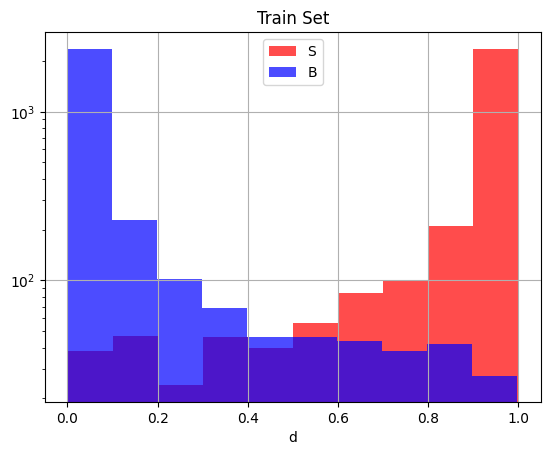

In [5]:
def discr(f, ns, nb, edgess, edgesb):  # f array con le features
  num = 1
  den1 = 1
  den2 = 1
  for i in range(3):
    num *= PDF(f[i], ns[i], edgess[i])
    den1 *= PDF(f[i], ns[i], edgess[i])
    den2 *= PDF(f[i], nb[i], edgesb[i])
  return num/(den1+den2)

print('d(mu_S):', discr(mu_S, nS, nB, edgesS, edgesB))
print('d(mu_B):', discr(mu_B, nS, nB, edgesS, edgesB))

dS = []
dB = []
for i in range(N):
  dS.append( discr(dataS[i,:], nS, nB, edgesS, edgesB) )
  dB.append( discr(dataB[i,:], nS, nB, edgesS, edgesB) )

plt.hist(dS, log=True, color='r', alpha=0.7, label='S')
plt.hist(dB, log=True, color='b', alpha=0.7, label='B')
plt.legend()
plt.xlabel('d')
plt.grid()
plt.title('Train Set')

In [6]:
def regola(d):
  if d>=0.5:
    return 1  # S
  else:
    return 0  # B

dS_train = dS[:train_size]
dB_train = dB[:train_size]


# metto tutto dentro una funzione
def prestazioni(ds, db):
  tp = 0
  tn = 0
  fp = 0
  fn = 0

  for i in range(len(ds)):
    xS = regola(dS[i])
    xB = regola(dB[i])
    if xS==1: tp+=1
    if xS==0: fn+=1
    if xB==1: fp+=1
    if xB==0: tn+=1

  accuracy = (tp+tn)/(tp+tn+fp+fn)
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  confusion_matrix = np.array([[tp, fn], [fp, tn]])

  print(f'''
  Prestazioni classificatore:
  accuracy = {accuracy}
  precision = {precision}
  recall = {recall}
  confusion matrix:
  {confusion_matrix}
  ''')
  return

prestazioni(dS_train, dB_train)


  Prestazioni classificatore:
  accuracy = 0.93575
  precision = 0.9350973539690465
  recall = 0.9365
  confusion matrix:
  [[1873  127]
 [ 130 1870]]
  


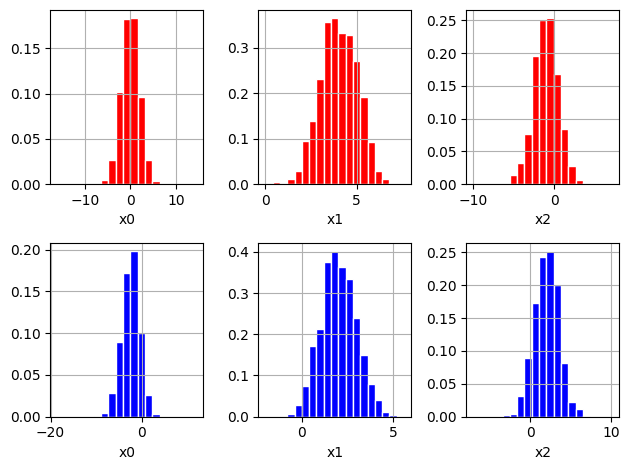


  Prestazioni classificatore:
  accuracy = 0.9345
  precision = 0.9314796425024826
  recall = 0.938
  confusion matrix:
  [[938  62]
 [ 69 931]]
  


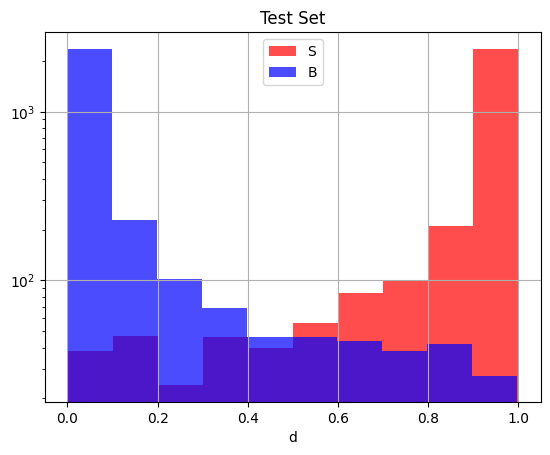

In [9]:
# ripeto tutto usando testS, testB

# calcolo delle pdf
M = 20

binsS = []
binsB = []
for i in range(3):
  minS = mu_S[i]-4*cov[i][i]
  maxS = mu_S[i]+4*cov[i][i]
  stepS = (maxS-minS)/M
  minB = mu_B[i]-4*cov[i][i]
  maxB = mu_B[i]+4*cov[i][i]
  stepB = (maxB-minB)/M
  binsS.append(np.arange(minS, maxS, stepS))
  binsB.append(np.arange(minB, maxB, stepB))

nS = []
nB = []
edgesS = []
edgesB = []

labels=['x0', 'x1', 'x2']
for i in range(3):
  plt.subplot(2,3,i+1)
  n1, edges1, _ = plt.hist(testS[:,i], binsS[i], density=True, color='red', edgecolor='white')
  plt.xlabel(labels[i])
  plt.grid()
  nS.append(n1)
  edgesS.append(edges1)
plt.tight_layout()
for i in range(3):
  plt.subplot(2,3,i+4)
  n2, edges2, _ = plt.hist(testB[:,i], binsB[i], density=True, color='blue', edgecolor='white')
  nB.append(n2)
  edgesB.append(edges2)
  plt.xlabel(labels[i])
  plt.grid()
plt.tight_layout()
plt.show()

dS_test = []
dB_test = []
for i in range(len(testS)):
  dS_test.append( discr(testS[i,:], nS, nB, edgesS, edgesB) )
  dB_test.append( discr(testB[i,:], nS, nB, edgesS, edgesB) )

plt.hist(dS, log=True, color='r', alpha=0.7, label='S')
plt.hist(dB, log=True, color='b', alpha=0.7, label='B')
plt.legend()
plt.xlabel('d')
plt.grid()
plt.title('Test Set')

prestazioni(dS_test, dB_test)

**Suggeriti per casa:**
1.   provare a giocare con le medie e le varianze delle osservabili, cambiandone i valori. A che punto il classificatore perde il suo potere di classificare gli eventi delle due classi?
2.   provare a ripetere il problema assumendo una matrice di covarianza correlata tra le osservabili (senza cambiare gli elementi della diagonale principale). Le prestazioni dell'algoritmo di classificazione migliorano o peggiorano?
3.   scrivere in python una funzione 2D che rappresenti la funzione: $f(x,y) = x^2-y^2-xy$
* graficarla con matplotlib (plot 2D $(x,y)$ con intensità colori $f(x)$)
* graficare le curve di livello (isocurve della funzione)

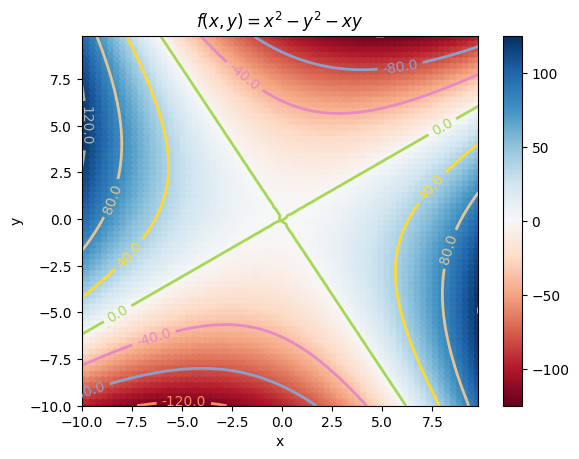

In [10]:
import matplotlib.pyplot as plt

def fun_2d(x,y):
  return x**2-y**2-x*y

xx = np.arange(-10,10,0.3)
yy = np.arange(-10,10,0.3)
X,Y = np.meshgrid(xx,yy)

Z = fun_2d(X,Y)
plt.scatter(X,Y, c=Z, cmap='RdBu')
plt.colorbar() # adding the colorbar on the right
cset = plt.contour(X,Y,Z,linewidths=2,cmap='Set2')
plt.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
plt.title('$f(x,y)=x^2-y^2-xy$')
plt.xlabel('x')
plt.ylabel('y')
plt.show()